In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/svsaj/Downloads/spam.csv", encoding='latin-1')


In [8]:
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [9]:
# Rename the columns 'v1' to 'label' and 'v2' to 'text' for better readability
df = df.rename(columns={'v1':'label', 'v2':'text'})
# selecting only the 'label' and 'text' columns to keep the DataFrame clean and consistent
df = df[['label','text']]  


In [11]:
print(df['label'].value_counts())
print(df['text'].head())
# ham → normal email
# spam → spam email


label
ham     4825
spam     747
Name: count, dtype: int64
0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: text, dtype: object


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)  
# Converting text to numerical features using TF-IDF, keeping top 3000 words
X = tfidf.fit_transform(df['text_clean']).toarray()


In [15]:
y = df['label'].map({'ham':0, 'spam':1}).values


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.97847533632287

Confusion Matrix:
 [[965   0]
 [ 24 126]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [19]:
def predict_email(text):
    text = clean_text(text)
    text_vector = tfidf.transform([text]).toarray()
    pred = model.predict(text_vector)
    return "Spam" if pred[0]==1 else "Not Spam"

# Test the function with example messages
print(predict_email("Congratulations! You won a free iPhone. Click here to claim."))
print(predict_email("Hi John, let's meet tomorrow for lunch."))


Spam
Not Spam


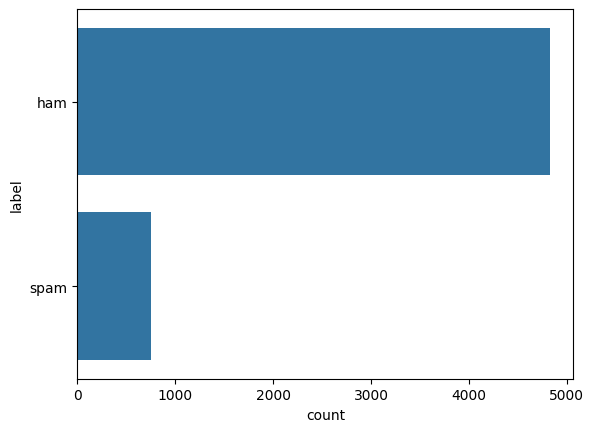

In [20]:
# Importing  libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Plots the count of each label (Spam vs Not Spam) in the dataset
sns.countplot(df['label'])
plt.show()
